## DAT405 Introduction to Data Science and AI
# Assignment 4: Spam classification using Naïve Bayes

Student name | Hours spent on the tasks
------------ | -------------
Lenia Malki | 10
Maële Belmont | 10

ask:
- binarize value

## Setup
Python modules need to be loaded to solve the tasks.

In [244]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import os
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from IPython.display import display_html 

## Task 1 - Preprocessing: 
#### a. Note that the email files contain a lot of extra information, besides the actual message. Ignore that for now and run on the entire text. Further down (in the higher grade part), you will be asked to filter out the headers and footers. 

#### b. We don’t want to train and test on the same data. Split the spam and the ham datasets in a training set and a test set.

In [24]:
#Method which saves files of a directory to a dataframe
def getFiles(folderpath):
    filepaths  = [os.path.join(folderpath, name) for name in os.listdir(folderpath)]
    df = pd.DataFrame(filepaths)
    return df

#Assign dataframes to variables
e_ham_files = getFiles('easy_ham')
h_ham_files = getFiles('hard_ham') 
spam_ham_files = getFiles('spam')

#Method which extract all messages from a dataframe containing file-paths
def getFileContent(dataFrame,k):
    messages = []
    for i in range(len(dataFrame)):
        filename = dataFrame.iloc[i,0]
        with open(filename, encoding="Latin-1") as f:
            messages.append([f.read(),k]) #The "k" indicates whether it is spam=1 or ham=0
    data = pd.DataFrame(messages, columns=["Content","Type"])
    return data

In [25]:
#Assigning file contents from directory to respective data frames
easyHamContent = getFileContent(e_ham_files,0)
hardHamContent = getFileContent(h_ham_files,0)
spamContent = getFileContent(spam_ham_files,1)

# Split data frames into training set and test set (70-30)
easyHamTrain, easyHamTest = train_test_split(easyHamContent, test_size=0.3, random_state=0)
hardHamTrain, hardHamTest = train_test_split(hardHamContent, test_size=0.3, random_state=0)
spamTrain, spamTest = train_test_split(spamContent, test_size=0.3, random_state=0)

## Task 2 - Write a Python program that:
#### a. Uses four datasets (hamtrain, spamtrain, hamtest, and spamtest)

#### b. Using a Naïve Bayes classifier (e.g. Sklearn), classifies the test sets and reports the  percentage of ham and spam test sets that were classified correctly. You can use CountVectorizer to transform the email texts into vectors. Please note that there are different types of Naïve Bayes Classifier in SKlearn (Document is available here). Test two of these classifiers: 1. Multinomial Naive Bayes and 2. Bernoulli Naive Bayes that are well suited for this problem. For the case of Bernoulli Naive Bayes you should use the parameter binarize to make the features binary. Discuss the differences between these two classifiers. 

In [249]:
def bayesClassifier(hamTrain, spamTrain, hamTest, spamTest):
    
    #Setting up parameters for classifer
    x_train = pd.concat([hamTrain["Content"], spamTrain["Content"]])
    y_train = pd.concat([hamTrain["Type"], spamTrain["Type"]])
    x_test = pd.concat([hamTest["Content"], spamTest["Content"]])
    y_test = pd.concat([hamTest["Type"], spamTest["Type"]])
    
    #Convert a collection of text documents to a matrix of token counts.
    #Needed in order to convert string to float for fitting 
    vectorizer = CountVectorizer()
    vectorizer.fit(x_train)
    trainVector = vectorizer.transform(x_train)
    testVector = vectorizer.transform(x_test)

    clf_MNB = MultinomialNB() # Multinomial Naive Bayes
    clf_BNB = BernoulliNB(fit_prior=False, binarize=1) # Bernouilli Naive Bayes

    #Fitting the model
    clf_MNB.fit(trainVector, y_train)
    clf_BNB.fit(trainVector, y_train)
    y_pred_MNB = clf_MNB.predict(testVector)
    y_pred_BNB = clf_BNB.predict(testVector)

    # Confusion matrix
    confusionMatrixMNB = metrics.confusion_matrix(y_test, y_pred_MNB)
    confusionMatrixBNB = metrics.confusion_matrix(y_test, y_pred_BNB)

    # Create figure with Seaborn
    fig, axs = plt.subplots(1, 2)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=2, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
    sns.heatmap(confusionMatrixMNB, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r', ax=axs[0], cbar=False)
    axs[0].set_xlabel('Predicted') #modify x label
    axs[0].set_ylabel('Actual') #modify y label
    sns.heatmap(confusionMatrixBNB, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r', ax=axs[1], cbar=False)
    axs[1].set_xlabel('Predicted') #modify x label
    axs[1].set_ylabel('Actual') #modify y label
    
    axs[0].set_title('Accuracy Score Multinomial Naive Bayes: {:.2f}%'.format(metrics.accuracy_score(y_test, y_pred_MNB)*100), size = 12); #set title
    axs[1].set_title('Accuracy Score Bernouilli Naive Bayes: {:.2f}%'.format(metrics.accuracy_score(y_test, y_pred_BNB)*100), size = 12); #set title


Differences between the two classifiers:







## Task 3 - Run your program on
#### i. Spam versus easy-ham

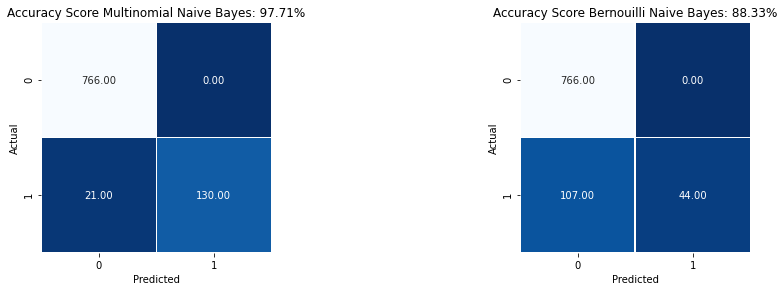

In [250]:
bayesClassifier(easyHamTrain, spamTrain, easyHamTest, spamTest)

#### ii. Spam versus hard-ham

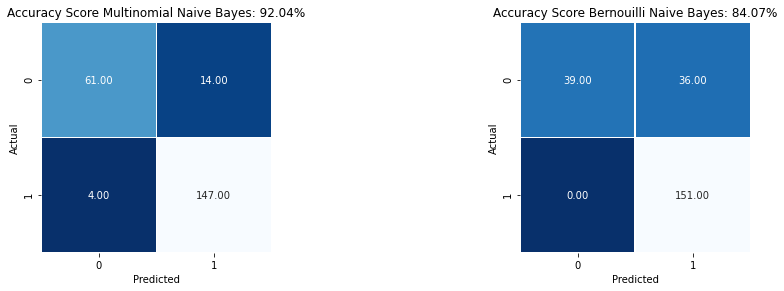

In [252]:
bayesClassifier(hardHamTrain, spamTrain, hardHamTest, spamTest)

## Task 4 - To avoid classification based on common and uninformative words it is common to filter these out. 
#### a. Argue why this may be useful. Try finding the words that are too common/uncommon in the dataset. 

In [253]:
def countWords(data, numberTOdisplay):
    countVect = CountVectorizer()
    countMatrix = countVect.fit_transform(data['Content'])
    countArray = countMatrix.toarray()
    words = pd.DataFrame(data=countArray,columns = countVect.get_feature_names())
    wordsSum = pd.DataFrame(words.sum(axis=0).sort_values(axis=0, ascending=False)).reset_index()
    wordsSum.columns = ['Word', 'Occurence']
    common = wordsSum.iloc[: numberTOdisplay, :]
    uncommon = wordsSum.tail(numberTOdisplay)
    df1_styler = common.style.set_table_attributes("style='display:inline'").set_caption('%.0f most common words in the dataset:' %(numberTOdisplay))
    df2_styler = uncommon.style.set_table_attributes("style='display:inline'").set_caption('%.0f of the most uncommon words in the dataset:' %(numberTOdisplay))

    display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

In [254]:
print('EASY-HAM')
countWords(easyHamContent, 10)

EASY-HAM


,Word,Occurence
0,com,38878
1,to,24254
2,the,24092
3,2002,22279
4,from,21795
5,net,19312
6,with,16461
7,by,16373
8,for,16063
9,localhost,15846


---

In [255]:
print('HARD-HAM')
countWords(hardHamContent, 10)

HARD-HAM


,Word,Occurence
0,com,25080
1,http,23389
2,td,22786
3,width,17740
4,3d,14164
5,font,13015
6,www,13007
7,tr,11429
8,the,10705
9,br,10251


---

In [257]:
print('SPAM')
countWords(spamContent, 10)

SPAM


,Word,Occurence
0,3d,11212
1,font,9235
2,to,6527
3,the,6027
4,com,5940
5,td,5479
6,from,4260
7,for,3964
8,and,3829
9,of,3699


---

#### b. Use the parameters in Sklearn’s CountVectorizer to filter out these words. Run the updated program on your data and record how the results differ from 3. You have two options to do this in Sklearn: either using the words found in part (a) or letting Sklearn do it for you.

> Max_df stands for maximum document frequency. We can ignore words which occur frequently. These words could be like the word ‘the’ that occur in every document and does not provide and valuable information to our text classification or any other machine learning model and can be safely ignored. Max_df looks at how many documents contain the word and if it exceeds the max_df threshold then it is eliminated from the sparse matrix. This parameter can again 2 types of values, percentage and absolute. [Source: TowardsDataScience](https://towardsdatascience.com/basics-of-countvectorizer-e26677900f9c)


In [270]:
def bayesClassifierFiltered(hamTrain, spamTrain, hamTest, spamTest, max_df):
    
    #Setting up parameters for classifer
    x_train = pd.concat([hamTrain["Content"], spamTrain["Content"]])
    y_train = pd.concat([hamTrain["Type"], spamTrain["Type"]])
    x_test = pd.concat([hamTest["Content"], spamTest["Content"]])
    y_test = pd.concat([hamTest["Type"], spamTest["Type"]])
    
    #Convert a collection of text documents to a matrix of token counts.
    #Needed in order to convert string to float for fitting 
    vectorizer = CountVectorizer(max_df = max_df)
    vectorizer.fit(x_train)
    trainVector = vectorizer.transform(x_train)
    testVector = vectorizer.transform(x_test)

    clf_MNB = MultinomialNB() # Multinomial Naive Bayes
    clf_BNB = BernoulliNB(fit_prior=False, binarize=1) # Bernouilli Naive Bayes

    #Fitting the model
    clf_MNB.fit(trainVector, y_train)
    clf_BNB.fit(trainVector, y_train)
    y_pred_MNB = clf_MNB.predict(testVector)
    y_pred_BNB = clf_BNB.predict(testVector)

    # Confusion matrix
    confusionMatrixMNB = metrics.confusion_matrix(y_test, y_pred_MNB)
    confusionMatrixBNB = metrics.confusion_matrix(y_test, y_pred_BNB)

    # Create figure with Seaborn
    fig, axs = plt.subplots(1, 2)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=2, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
    sns.heatmap(confusionMatrixMNB, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r', ax=axs[0], cbar=False)
    axs[0].set_xlabel('Predicted') #modify x label
    axs[0].set_ylabel('Actual') #modify y label
    sns.heatmap(confusionMatrixBNB, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r', ax=axs[1], cbar=False)
    axs[1].set_xlabel('Predicted') #modify x label
    axs[1].set_ylabel('Actual') #modify y label
    
    axs[0].set_title('Accuracy Score Multinomial Naive Bayes: {:.2f}%'.format(metrics.accuracy_score(y_test, y_pred_MNB)*100), size = 12); #set title
    axs[1].set_title('Accuracy Score Bernouilli Naive Bayes: {:.2f}%'.format(metrics.accuracy_score(y_test, y_pred_BNB)*100), size = 12); #set title


#### i. Spam versus Easy Ham

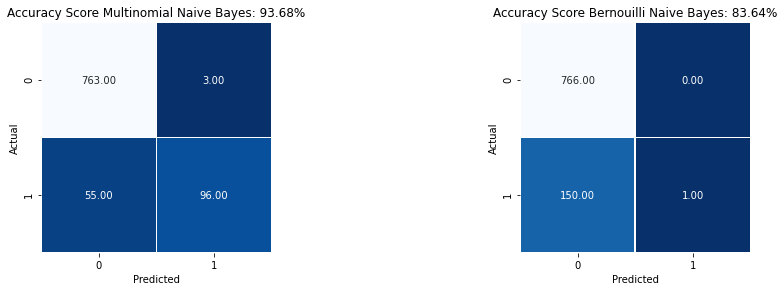

In [271]:
bayesClassifierFiltered(easyHamTrain, spamTrain, easyHamTest, spamTest, 1)

#### ii. Spam versus hard-ham

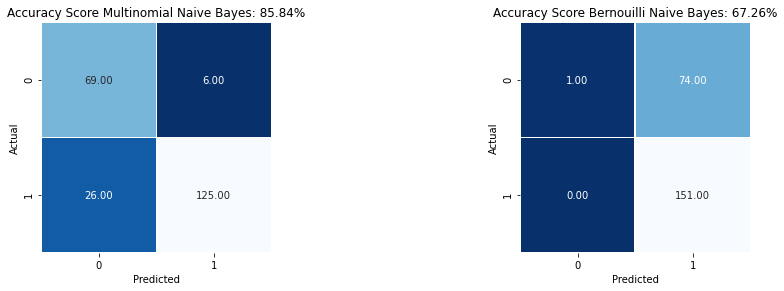

In [272]:
bayesClassifierFiltered(hardHamTrain, spamTrain, hardHamTest, spamTest, 1)

## Task 5 - Filter out the headers and the footers of the emails before you run on them. The format may vary somewhat between emails, which can make this a bit tricky, so perfect filtering is not required. Run your program again and answer the following questions: 
#### a. Does the result improve from 3 and 4?

#### b. The split of the data set into a training set and a test set can lead to very skewed results. Why is this, and do you have suggestions on remedies?

#### c. What do you expect would happen if your training set were mostly spam messages while your test set were mostly ham messages?